# Student Performance Indicator

**We are going to follow the following steps:**
1. Understanding Problem Statement **`Done`**
1. Data Collection **`Done`**
1. Data Cleaning **`Done`**
1. EDA & Feature Engineering
1. Data Preprocessing
1. Basic Model Training
1. Basic Model Evaluation

## 4. EDA & Feature Engineering

#### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Importing Dataset

In [2]:
df = pd.read_csv('../data/student.csv')

### 4.1 Feature Engineering

#### Adding Important Columns 
* Total Score 
* Average Score

In [3]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


Full Marks Student Count

In [4]:
rf = df[df['reading_score'] == 100]['average_score'].count()
wf = df[df['writing_score'] == 100]['average_score'].count()
mf = df[df['math_score'] == 100]['average_score'].count()

print(f'Number of students with full marks in Mathematics: {mf}')
print(f'Number of students with full marks in Writing: {wf}')
print(f'Number of students with full marks in Reading: {rf}')

Number of students with full marks in Mathematics: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


Failed Student Count

In [5]:
fr = df[df['reading_score'] <= 30]['average_score'].count()
fw = df[df['writing_score'] <= 30]['average_score'].count()
fm = df[df['math_score'] <= 30]['average_score'].count()

print(f'Number of students with less than 30 marks in Maths: {fm}')
print(f'Number of students with less than 30 marks in Writing: {fw}')
print(f'Number of students with less than 30 marks in Reading: {fr}')

Number of students with less than 30 marks in Maths: 16
Number of students with less than 30 marks in Writing: 10
Number of students with less than 30 marks in Reading: 8


#### Conclusion  

* Students have performed worst in Mathematics.
* Students have peformed best in Reading Section.

### 4.2 Data Visualisation & Analysis

**What questions we have to answer?** 
1. How does different features affect the Average Score, Avg. Score of Female, Avg. Score of Male?
1. What is the maximum score students obtained in each subject?  
   How are the marks distributed across overall range?
1. Which category in different categorical features have high distribution/contribution?  
   Is the dataset balanced? (Mulivariate Analysis)
1. What is feature-wise visulisation of data?  
   How the features distributed themselves? (Univariate Analysis)  
   How are they related to target/other features? (Bivariate Analysis)  

#### 4.2.1 Average Score Distribution

##### Gender

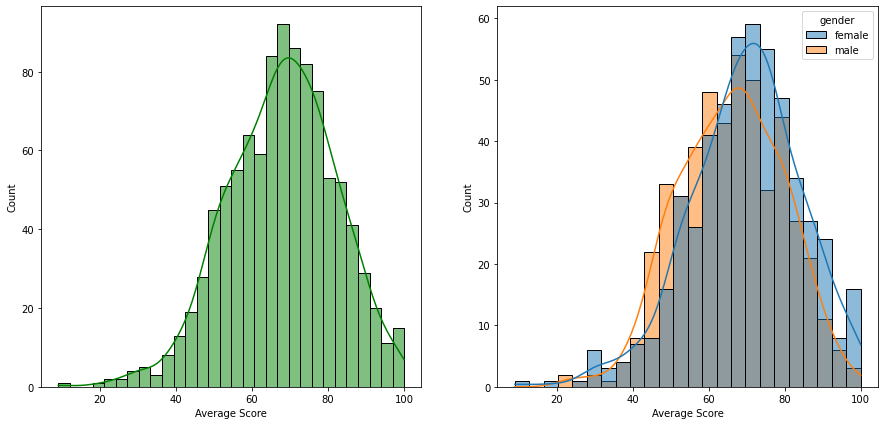

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1
sns.histplot(data = df, x = 'average_score', bins = 30, kde = True, color = 'g', ax = axes[0])
axes[0].set_xlabel("Average Score")

# Plot 2
plt.subplot(122)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'gender', ax=axes[1])
axes[1].set_xlabel("Average Score")

plt.show() 

Insights
* Female students tend to perform well than male students

##### Lunch

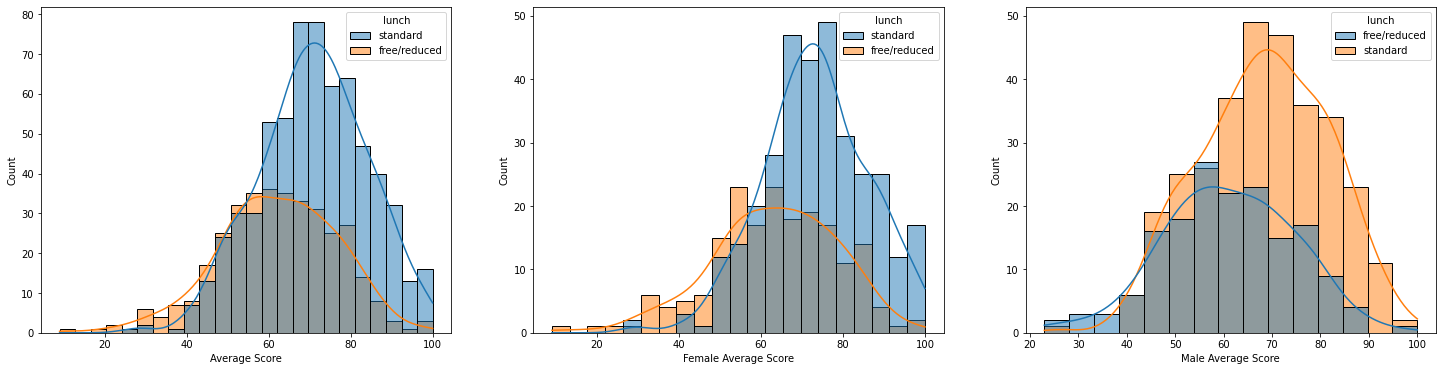

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# First subplot
sns.histplot(data=df, x='average_score', kde=True, hue='lunch', ax=axes[0])
axes[0].set_xlabel("Average Score") 

# Second subplot
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='lunch', ax=axes[1])
axes[1].set_xlabel("Female Average Score")

# Third subplot
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='lunch', ax=axes[2])
axes[2].set_xlabel("Male Average Score")

plt.show()


Insights  
* Standard lunch helps students perform well in exams.
* Standard lunch isn't related to gender, it improves performance of both genders.

##### Parental level of education

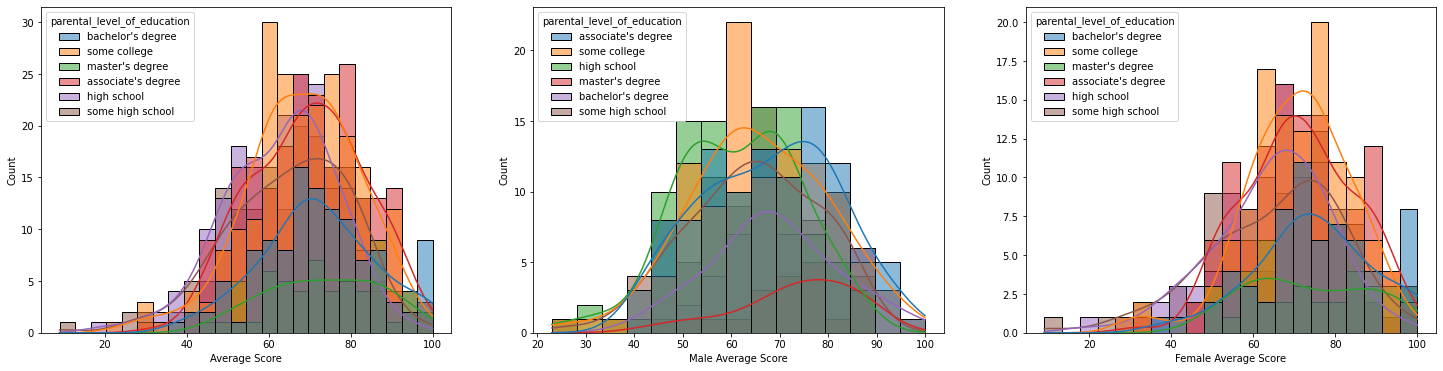

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# First subplot
ax = sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education', ax=axes[0])
ax.set_xlabel("Average Score")

# Second subplot
ax = sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='parental_level_of_education', ax=axes[1])
ax.set_xlabel("Male Average Score")

# Third subplot
ax = sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='parental_level_of_education', ax=axes[2])
ax.set_xlabel("Female Average Score")

plt.show()


Insights  
* Parental education doesn't affect the performance of students.
* For male students, associate's and master's degree parents have high performance trend, but for female students there isn't any particular trend.

##### Race/Ethnicity

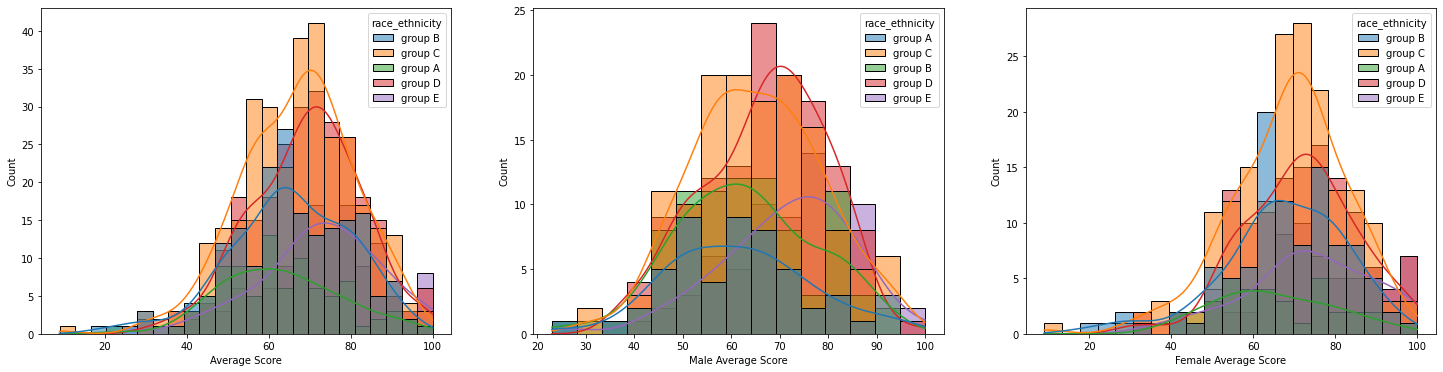

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# First subplot
ax = sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity', ax=axes[0])
ax.set_xlabel("Average Score")

# Second subplot
ax = sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='race_ethnicity', ax=axes[1])
ax.set_xlabel("Male Average Score")

# Third subplot
ax = sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='race_ethnicity', ax=axes[2])
ax.set_xlabel("Female Average Score")

plt.show()


Insights 
* Students of group A and group B performs poorly in exams irrespective of their genders.

#### 4.2.2 Maximum score distribution of each subject

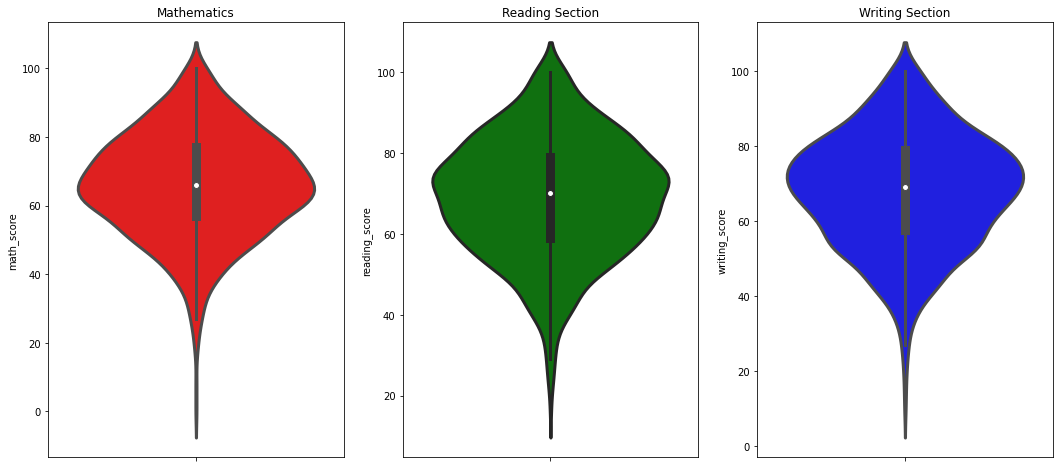

In [10]:
plt.figure(figsize=(18,8))

plt.subplot(1, 3, 1)
plt.title('Mathematics')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)

plt.subplot(1, 3, 2)
plt.title('Reading Section')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)

plt.subplot(1, 3, 3)
plt.title('Writing Section')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights  
* From above three plots we can see that, for mathematics mostly students score between strict 60 - 80 while for reading and writing section there is a broad spectrum of scores between 50 - 80 (especially in writing section).

#### 4.2.3 Multivariate Analysis (Pie Plot Comparision)

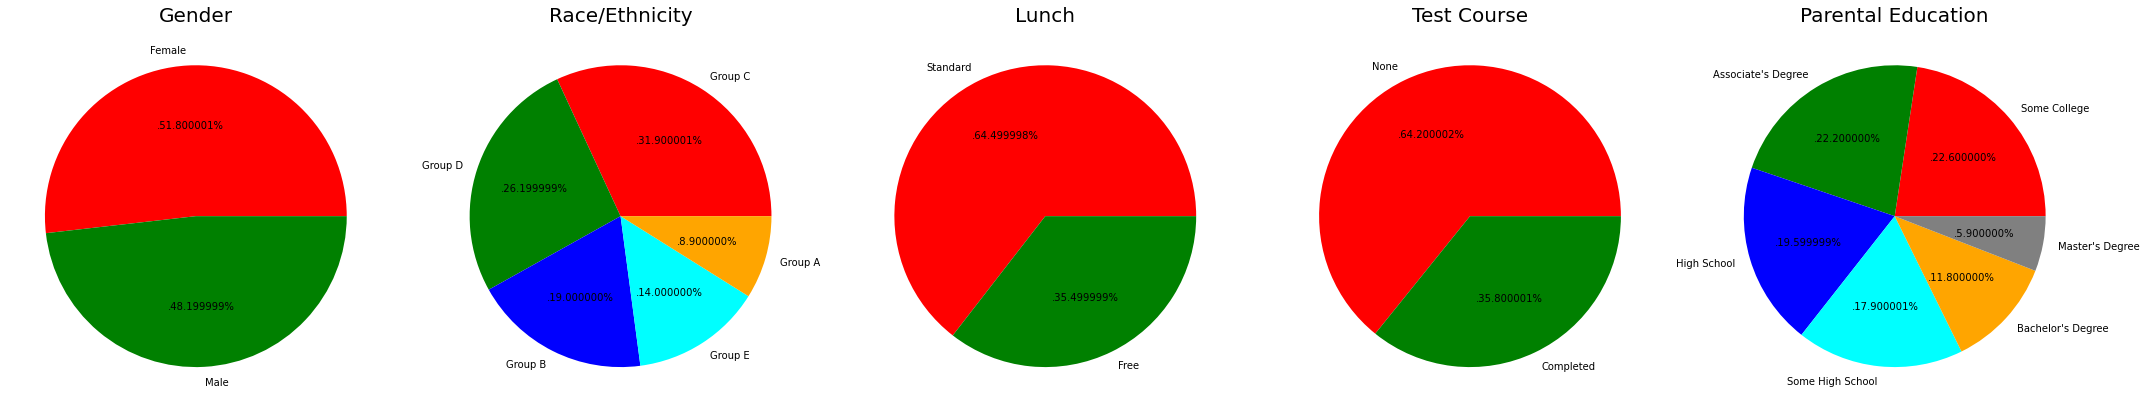

In [11]:
plt.rcParams['figure.figsize'] = (30, 12)

# Plot 1
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

# Plot 2
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

# Plot 3
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

# Plot 4
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

# Plot 5
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Insights 
* There is balanced distribution of students based on gender.
* Mostly students aren't completed or not enrolled in any test course. (65% haven't completed test course)
* From Parent's education side mostly of them are college passouts, associate's degree holder or high school passouts.  
* Very few of the parents are master's degree holder.
* More than 50% of students belong from group C and group D.
* Mostly students (65%) take standard lunch over free lunch. 

#### 4.2.4 Feature-Wise Visualisation

##### Gender

`Q` What is distribution of gender? (Univariate Analysis)

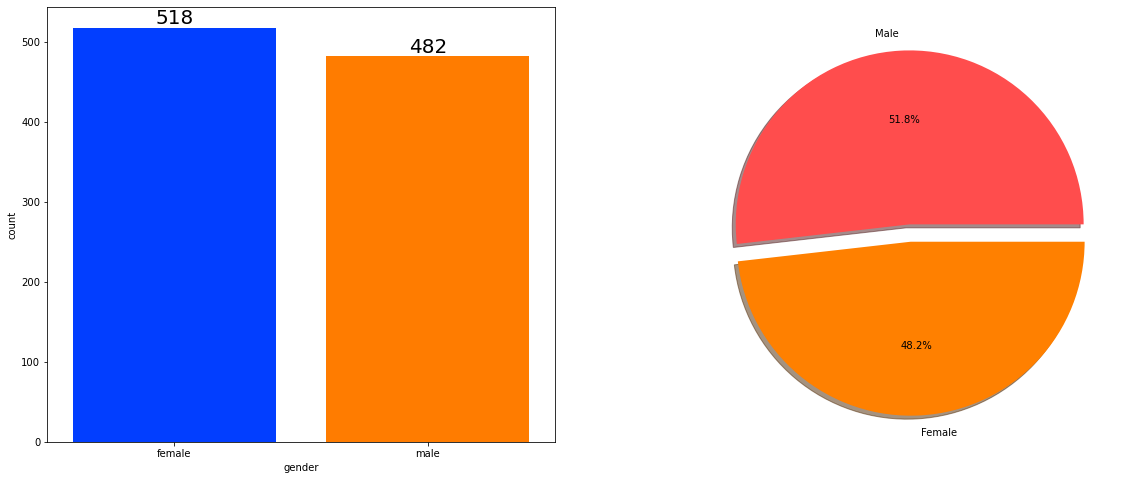

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8))

sns.countplot(x = df['gender'], data = df, palette = 'bright', ax = axes[0], saturation = 1)
for c in axes[0].containers:
    axes[0].bar_label(c, color = 'black', size = 20)
    
plt.pie(x = df.gender.value_counts(), labels = ['Male', 'Female'], explode = [0, 0.1], autopct = '%1.1f%%', shadow = True, colors = ['#ff4d4d','#ff8000'])
plt.show()

Insights  
* Gender have almost balanced distribution with female students are 518 and male students are 482.

`Q` Does gender have any impact on student's performance? (Bivariate Analysis)

In [13]:
gender_group = df.groupby('gender').agg({'average_score': np.mean, 'math_score': np.mean})
gender_group

,average_score,math_score
gender,,
female,69.569498,63.633205
male,65.837483,68.728216


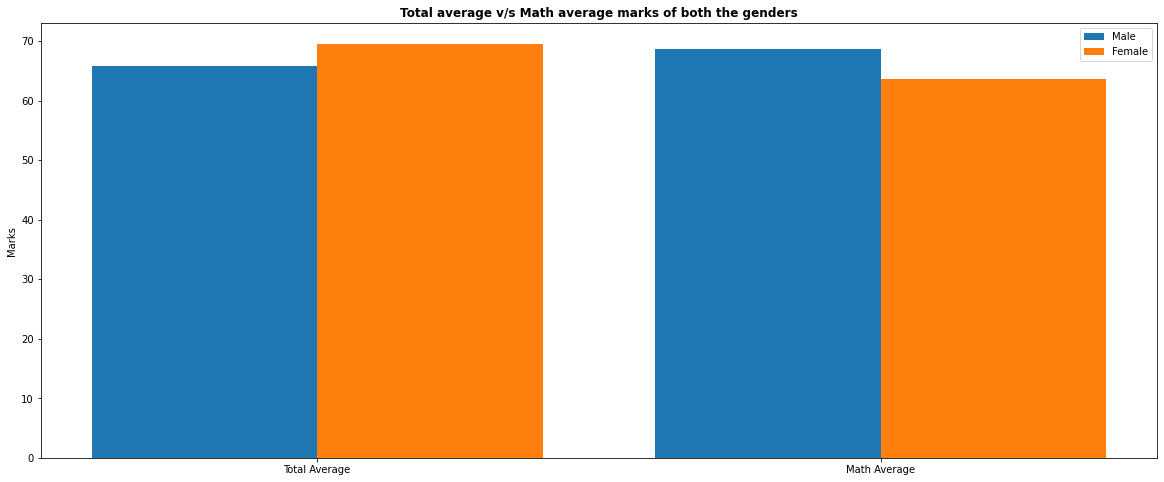

In [14]:
plt.figure(figsize=(20, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights  
* For an overall average females performed better than males.
* For mathematics males have performed better than females.

##### Race/Ethnicity

`Q` What is group wise distribution? (Univariate Analysis)

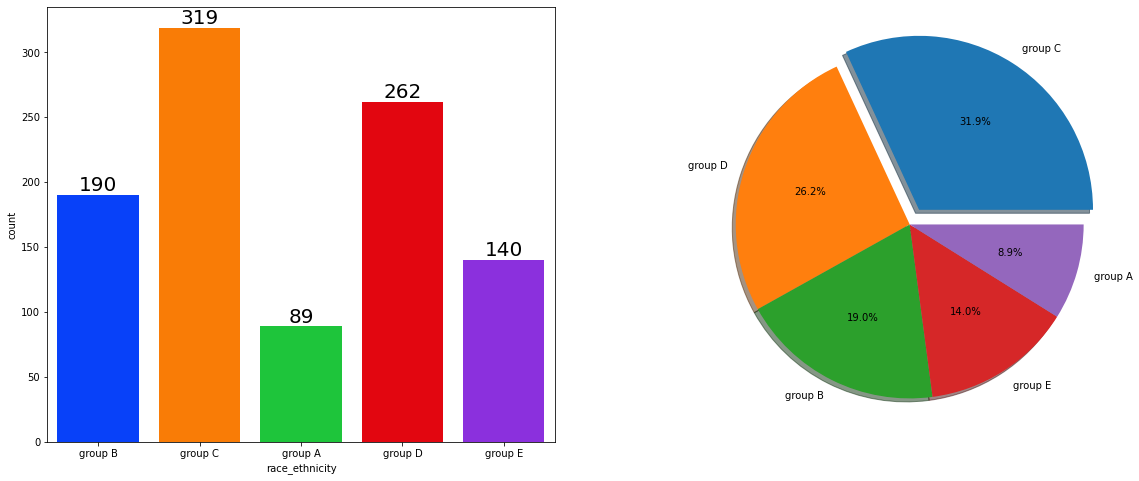

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (20,8))
sns.countplot(x = df['race_ethnicity'], data = df, palette = 'bright',ax = axes[0], saturation = 0.95)
for c in axes[0].containers:
    axes[0].bar_label(c, color = 'black', size = 20)
    
plt.pie(x = df['race_ethnicity'].value_counts(), labels = df['race_ethnicity'].value_counts().index, explode = [0.1,0,0,0,0], autopct = '%1.1f%%', shadow = True)
plt.show()   

Insights 
* Most of the students belong from group C and group D.
* Least number of students belong from group A.

`Q` Does Race/Ethnicity have impact on student's performance? (Bivariate Analysis)

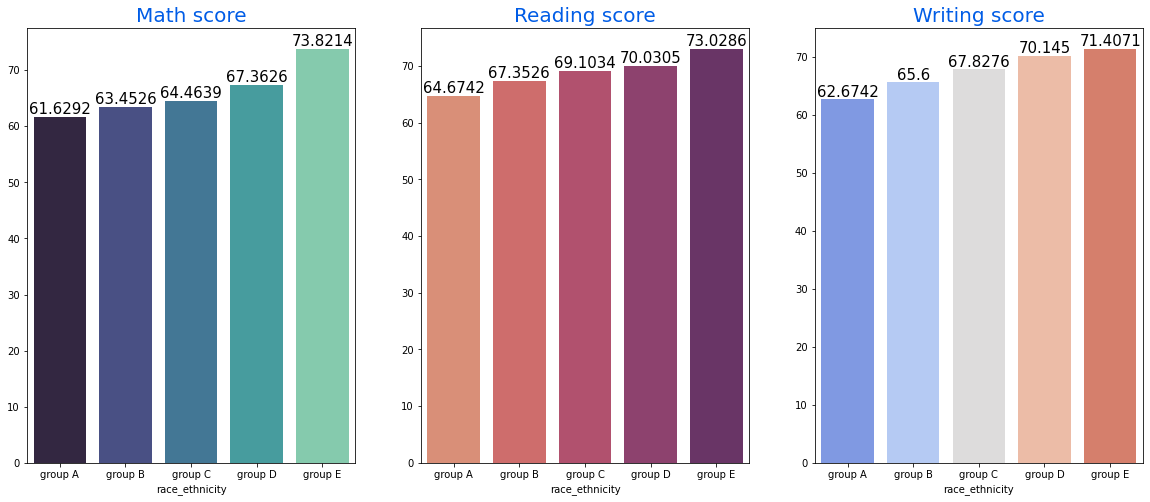

In [16]:
race_group = df.groupby('race_ethnicity')

fig, axes = plt.subplots(1, 3, figsize = (20, 8))

sns.barplot(x = race_group['math_score'].mean().index, y = race_group['math_score'].mean().values, palette  =  'mako', ax = axes[0])
axes[0].set_title('Math score', color = '#005ce6', size = 20)

for container in axes[0].containers:
    axes[0].bar_label(container, color = 'black', size = 15)

sns.barplot(x = race_group['reading_score'].mean().index, y = race_group['reading_score'].mean().values, palette  =  'flare', ax = axes[1])
axes[1].set_title('Reading score', color = '#005ce6', size = 20)

for container in axes[1].containers:
    axes[1].bar_label(container, color = 'black', size = 15)

sns.barplot(x = race_group['writing_score'].mean().index, y = race_group['writing_score'].mean().values, palette  =  'coolwarm', ax = axes[2])
axes[2].set_title('Writing score', color = '#005ce6', size = 20)

for container in axes[2].containers:
    axes[2].bar_label(container, color = 'black', size = 15)

Insights 
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower socio-economic status have a lower average in all subjects.

##### Parental Education

`Q` What is educational background of student's parent? (Univariate Analysis)

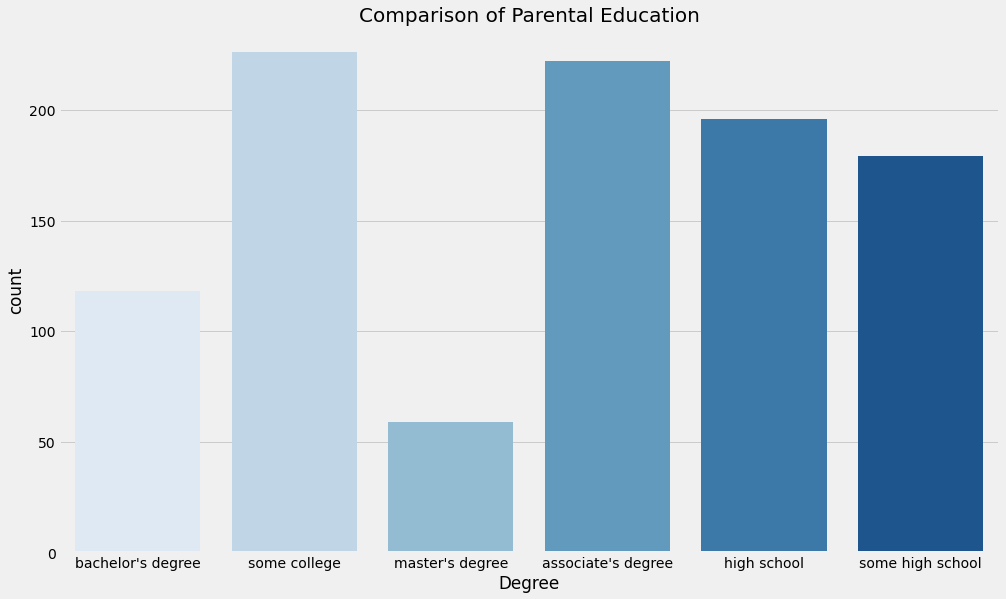

In [17]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental_level_of_education'], palette = 'Blues')

plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')

plt.show()

Insights 
* Largest number of parents are from some college.

`Q` Does parental education creates any difference in student's performance? (Bivariate Analysis)

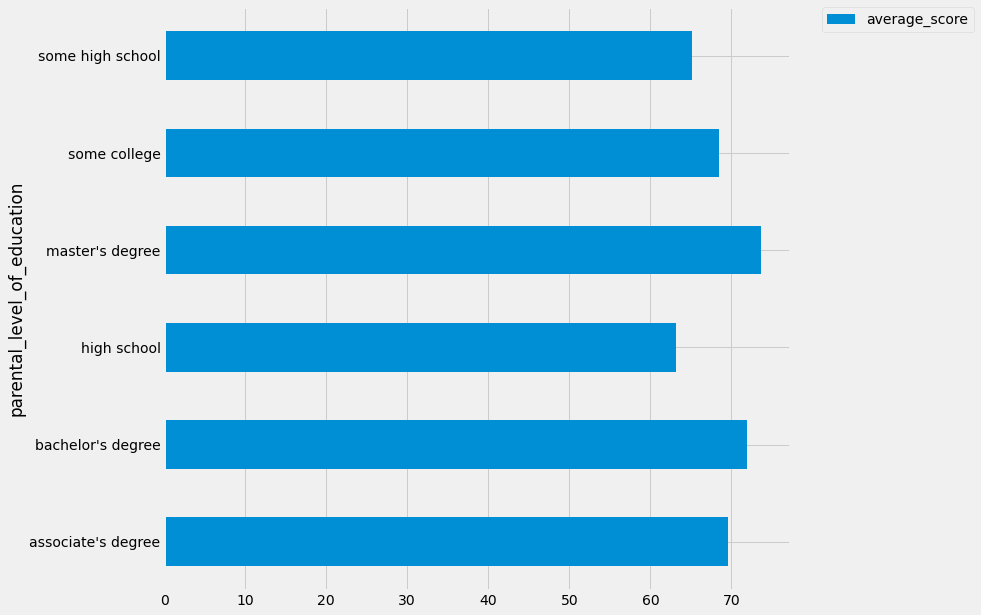

In [18]:
df.groupby('parental_level_of_education').agg({'average_score' : np.mean}).plot(kind = 'barh', figsize = (10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights 
* Students whose parents have master's and bachelor's degree have performed better than others.

##### Lunch

`Q` What type of lunch is most common among students? (Univariate Analysis)

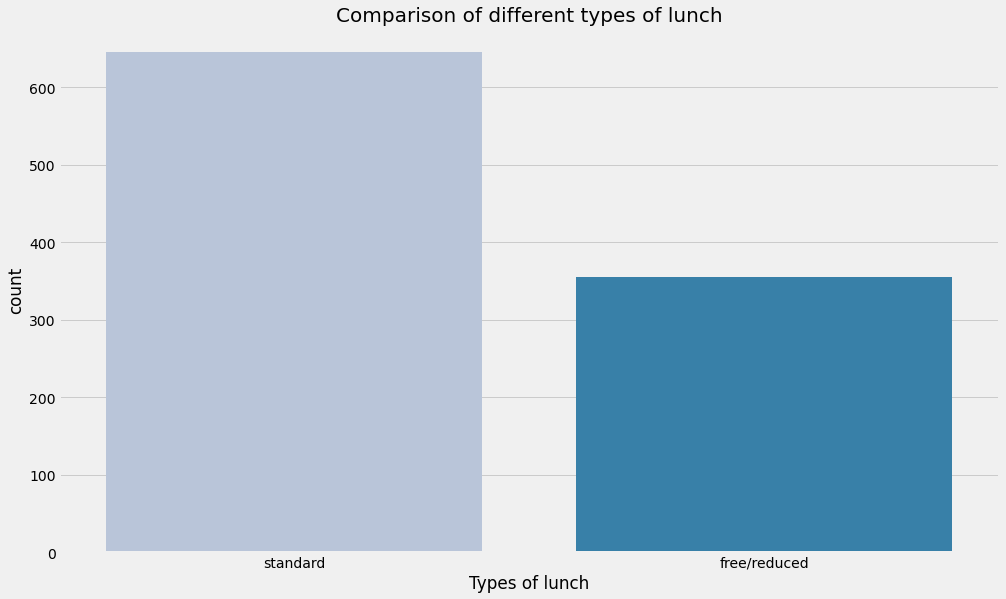

In [19]:
plt.rcParams['figure.figsize'] = (15, 9)

sns.countplot(df['lunch'], palette = 'PuBu')

plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Types of lunch')
plt.ylabel('count')

plt.show()

Insights 
* Standard lunch is more common than free lunch among students.

`Q` How are lunch and performance of students interdependent? (Bivariate Analysis)

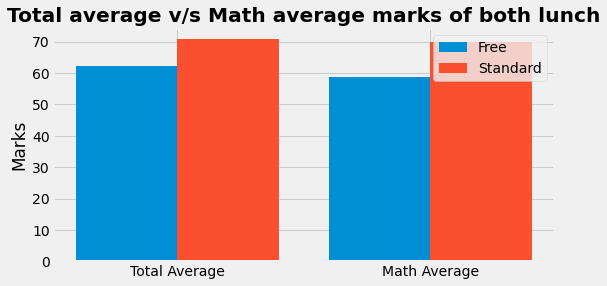

In [20]:
lunch_group = df.groupby('lunch').agg({'average_score': np.mean, 'math_score': np.mean})

plt.figure(figsize=(8, 4))
X = ['Total Average','Math Average']

free_lunch_score = [lunch_group['average_score'][0], lunch_group['math_score'][0]]
standard_lunch_score = [lunch_group['average_score'][1], lunch_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, free_lunch_score, 0.4, label = 'Free')
plt.bar(X_axis + 0.2, standard_lunch_score, 0.4, label = 'Standard')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both lunch", fontweight='bold')
plt.legend()
plt.show()

Insights 
* Students who get standard lunch tent to perform better than students who got free/reduced lunch.

##### How parental education related to lunch and test preparation course?

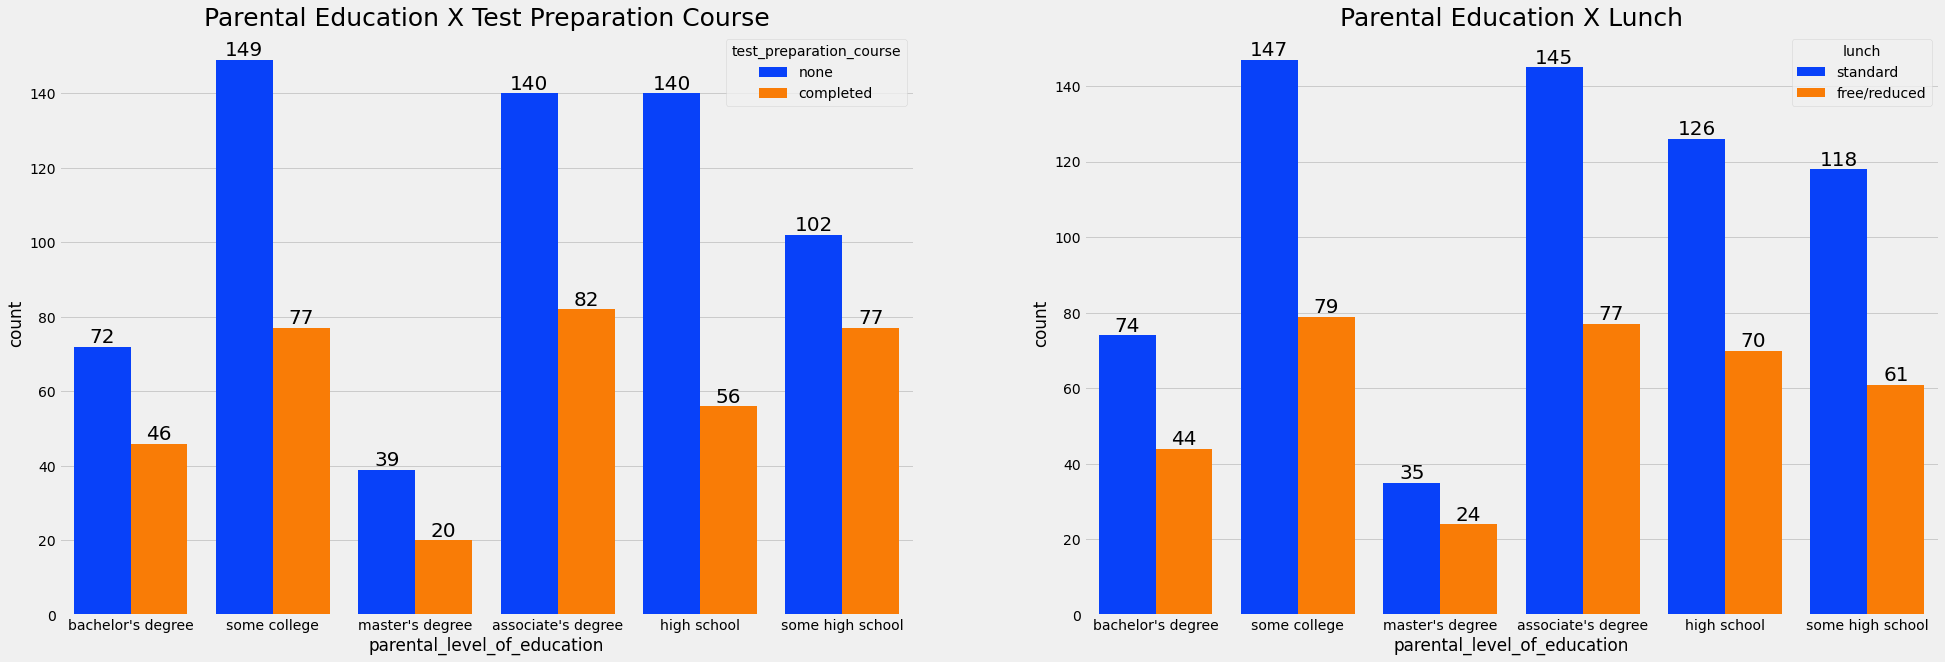

In [21]:
f, ax = plt.subplots(1, 2, figsize = (30, 10))

sns.countplot(x = df['parental_level_of_education'], data = df, palette  =  'bright', hue = 'test_preparation_course', saturation = 0.95, ax = ax[0])
ax[0].set_title('Parental Education X Test Preparation Course', color = 'black', size = 25)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
    
sns.countplot(x = df['parental_level_of_education'], data = df, palette  =  'bright', hue = 'lunch', saturation = 0.95, ax = ax[1])
ax[1].set_title('Parental Education X Lunch', color = 'black', size = 25)
for container in ax[1].containers:
    ax[1].bar_label(container,color = 'black',size = 20)   

Insights 
* There isn't any significant dependency of parental education over lunch and test preparation course.

##### Interscore Relationship

Pair Plot 

<Figure size 360x360 with 0 Axes>

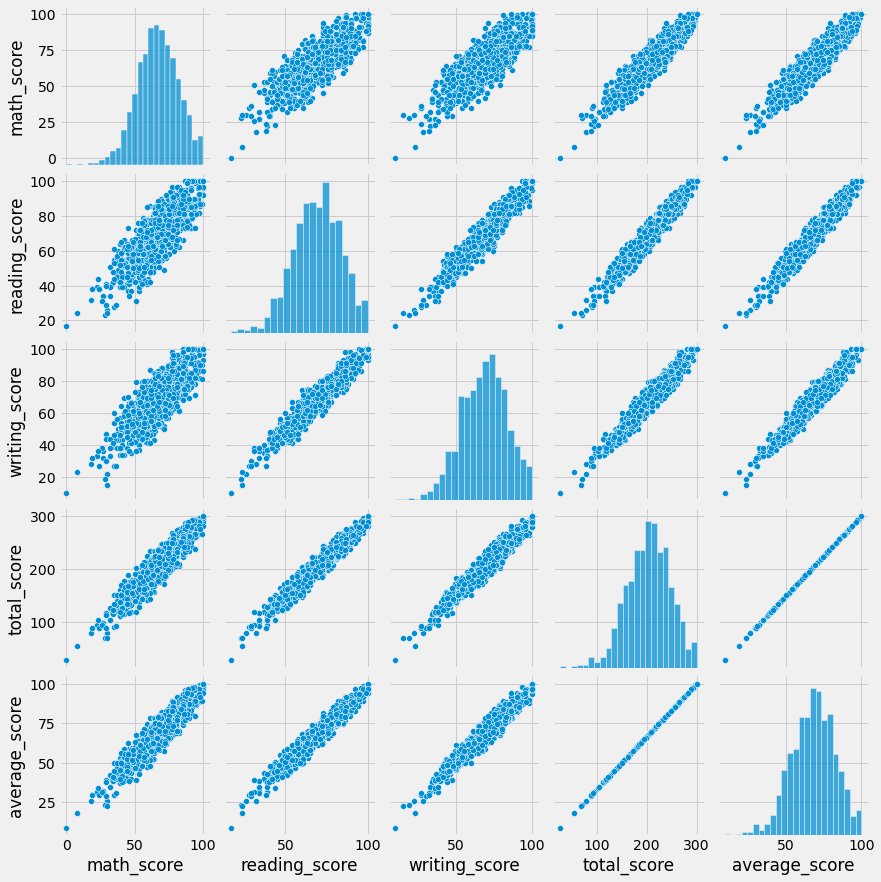

In [22]:
plt.figure(figsize = (5, 5))
sns.pairplot(df)
plt.show()

Correlation Matrix

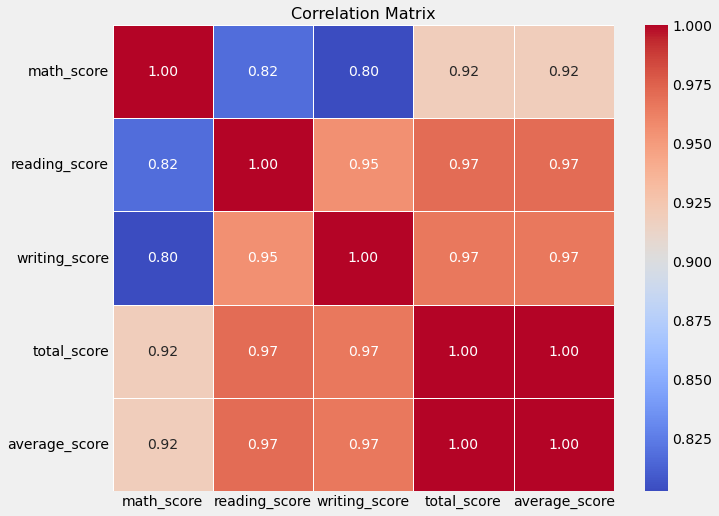

In [23]:
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Insights 
* From above plots it is clear that all the scores increase linearly with each other.
* Though reading and writing section aren't related to math scores but they are directly related to average and total scores and hence, to the performance of students.

#### Conclusions

* Student's performance is related to lunch, race and parental education.
* Females overall perform better than males and also are top scorers.
* Test preparation course doesn't impact student performance.
* Although, finishing preparation course is beneficial.
* All the scores increase linearly with each other and thus, all scores are direclty be influenced by above mentioned features.

## 5. Data Preprocessing

As our data is free from outliers and doesn't contain any missing, duplicate or garbage value. We already have preprocessed data.  
However we can apply Min-Max Scaling to total score feature to scale it down in data range between [0 - 100]

> **Min - Max Scaling Formula:**  
>
> Unit Scaled Value = (Original value - Min value) / (Max Value - Min Value)  
> New Scaled Value = (Unit Scaled Value * (New Max Value - New Min Value)) + New Min Value

In [24]:
# Min-Max Scaling
new_min_value = 0
new_max_value = 100

max_value = df.total_score.max()
min_value = df.total_score.min()

df['total_score'] = (((df['total_score'] - min_value) / (max_value - min_value)) * (new_max_value - new_min_value)) + new_min_value
df['total_score'].head()

0    69.963370
1    80.586081
2    91.941392
3    44.322344
4    73.992674
Name: total_score, dtype: float64

Storing preprocessed data into data folder

In [25]:
PREPROCESS_PATH = '../data/preprocessed_student.csv'
df.to_csv(PREPROCESS_PATH, index=False)
print("Preprocessed Data is stored successfully - PATH - ", PREPROCESS_PATH)

Preprocessed Data is stored successfully - PATH -  ../data/preprocessed_student.csv
